<a href="https://colab.research.google.com/github/VictorMadu/Coursera-Deep-Learning-Specialization-Course/blob/master/PandasBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
! pip install -q kaggle

from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"victorebube","key":"41bc1679d4caf85ca05dab28ff65d0a6"}'}

In [ ]:
import os
os.rename("kaggle (1).json", "kaggle.json")

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets list

In [ ]:
! kaggle competitions download -c competitive-data-science-final-project

  0% 0.00/469k [00:00<?, ?B/s]
100% 469k/469k [00:00<00:00, 67.2MB/s]
  0% 0.00/368k [00:00<?, ?B/s]
100% 368k/368k [00:00<00:00, 121MB/s]
  0% 0.00/3.49k [00:00<?, ?B/s]
100% 3.49k/3.49k [00:00<00:00, 3.65MB/s]
  0% 0.00/3.49k [00:00<?, ?B/s]
100% 3.49k/3.49k [00:00<00:00, 3.62MB/s]
  0% 0.00/2.91k [00:00<?, ?B/s]
100% 2.91k/2.91k [00:00<00:00, 3.03MB/s]
  0% 0.00/1.01M [00:00<?, ?B/s]
100% 1.01M/1.01M [00:00<00:00, 67.9MB/s]
 78% 10.0M/12.9M [00:00<00:00, 26.9MB/s]
100% 12.9M/12.9M [00:00<00:00, 37.0MB/s]


Version 1.0.3

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [ ]:
import zipfile
with zipfile.ZipFile('/content/items.csv.zip', 'r') as f:
    f.extractall()

In [ ]:
# DATA_FOLDER = '../readonly/final_project_data/'
DATA_FOLDER = ''

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

In [ ]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [ ]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [ ]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [ ]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [ ]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [ ]:
# YOUR CODE GOES HERE
print("Transactions data shape: ", transactions.shape, "\n")
print("Items data shape: ", items.shape, "\n")
print("Item Categories data shape: ", item_categories.shape, "\n")
print("Shops data shape: ", shops.shape, "\n")

Transactions data shape:  (2935849, 6) 

Items data shape:  (22170, 3) 

Item Categories data shape:  (84, 2) 

Shops data shape:  (60, 2) 



In [ ]:
transactions = pd.merge(transactions, items, on=("item_id"), how="left")
transactions = pd.merge(transactions, item_categories, on=("item_category_id"), how="left")
transactions = pd.merge(transactions, shops, on=("shop_id"), how="left")

In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   date_block_num      int64  
 2   shop_id             int64  
 3   item_id             int64  
 4   item_price          float64
 5   item_cnt_day        float64
 6   item_name           object 
 7   item_category_id    int64  
 8   item_category_name  object 
 9   shop_name           object 
dtypes: float64(2), int64(4), object(4)
memory usage: 246.4+ MB


In [ ]:
transactions.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00,4.000138e+01
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00,1.710076e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01,0.000000e+00
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00,2.800000e+01
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00,4.000000e+01
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00,5.500000e+01
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03,8.300000e+01


Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with strings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [ ]:
transactions['date'] = pd.to_datetime(transactions['date'])

transactions['year'] = transactions['date'].dt.year
transactions['month'] = transactions['date'].dt.month
transactions['day'] = transactions['date'].dt.day
transactions['item_revenue'] = transactions['item_price'] * transactions['item_cnt_day']

In [ ]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name,year,month,day,revenue
0,2013-02-01,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",2013,2,1,999.00
1,2013-03-01,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",2013,3,1,899.00
2,2013-05-01,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",2013,5,1,-899.00
3,2013-06-01,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",2013,6,1,1709.05
4,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум""",2013,1,15,1099.00


In [ ]:
twenty_fourteen = transactions[transactions.year==2014]
sept_twenty_fourteen = twenty_fourteen[twenty_fourteen.month==9]

In [ ]:
grouped = sept_twenty_fourteen.groupby(["shop_id"])
summed = grouped.item_revenue.agg(np.sum)

max_revenue = summed.loc[summed.idxmax()]
print(max_revenue)

7785687.999999878


In [ ]:
max_revenue = np.array(7982852.20, dtype=np.float64)

In [ ]:
# YOUR CODE GOES HERE

# max_revenue = # PUT YOUR ANSWER IN THIS VARIABLE

grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.2


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [ ]:
def year_period(row):
  if row in [6, 7, 8]:
    return 'summer'
  else: 
    return 'not_summer'

In [ ]:
twenty_fourteen['year_period'] = twenty_fourteen['month'].map(year_period)
summer = twenty_fourteen[twenty_fourteen.year_period == "summer"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
categories = summer.groupby(["item_category_id"])
categories_summed = categories.item_revenue.agg(np.sum)
print(categories_summed.head())

item_category_id
2    3320491.65
3    7212669.60
4      41954.20
5     415086.70
6    3529755.50
Name: item_revenue, dtype: float64


In [ ]:
category_id_with_max_revenue = categories_summed.idxmax()
print(category_id_with_max_revenue )

12


In [ ]:
category_id_with_max_revenue = np.array(20, dtype=np.int64)

In [ ]:
# YOUR CODE GOES HERE

# category_id_with_max_revenue = # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [ ]:
id_price = transactions.loc[:, ["item_id", "item_price"]]
id_price["item_price"] = id_price.item_price.abs()
group = id_price.groupby("item_id")

In [ ]:
counts = group.item_price.nunique()

constant_prices = len([index for index in counts.index if counts.loc[index] == 1])
print(constant_prices)

5926


In [ ]:
# YOUR CODE GOES HERE

num_items_constant_price =  constant_prices  # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014? Do not count the items, that were sold but returned back later.</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`). 
* If there were no sales at a given day, ***do not*** impute missing value with zero, just ignore that day

In [ ]:
shop_id = 25

In [ ]:
twenty_fives = twenty_fourteen[(transactions.shop_id==shop_id) & (transactions.month==12)]
twenty_fives = twenty_fives[twenty_fives.year == 2014]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
shop_grouped = twenty_fives.groupby("day")
count_per_day = shop_grouped.item_cnt_day.sum()
print(count_per_day.head())

day
1    200.0
2    190.0
3    204.0
4    301.0
5     90.0
Name: item_cnt_day, dtype: float64


In [ ]:
total_num_items_sold_var = count_per_day.var()
print(total_num_items_sold_var)

119526.57586206897


In [ ]:
# 117211.103448
total_num_items_sold_var = 117167.70

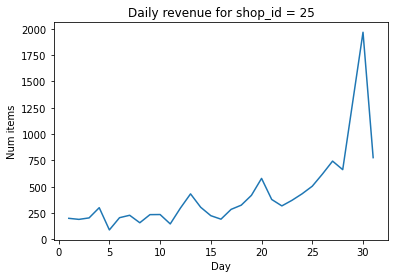

Current answer for task total_num_items_sold_var is: 117167.7


In [ ]:
shop_id = 25

total_num_items_sold = count_per_day.values      # YOUR CODE GOES HERE
days = count_per_day.index     # YOUR CODE GOES HERE

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [ ]:
STUDENT_EMAIL = "ebube.madu.243204@unn.edu.ng"
STUDENT_TOKEN = "s6qGtOWuZ4ifiEpo"
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.2
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.7


In [ ]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)